In [1]:
import numpy as np
import qutip
import copy
import time
from matplotlib import pyplot as plt
from matplotlib import cm

#import cca modules
import states
import multi_cavity
import plot
import time_evolution
import rand
import metrics


from IPython.display import display, Markdown, HTML, Math, Latex
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))


In [3]:
#cavity array params
num_cavities = 5
num_emitters = 1 #emitters per cavity
num_photons = 1 #Hamiltonian conserved number
periodic = False #periodic boundary conditions
g = 5 #cavity-emitter coupling constant
kappa = 10 #cavity loss rate
gamma = 1/5.8 #emitter loss rate
J = 5 #cavity-cavity photon hopping rate

# params are either int or list for every element
model_params = {
        'emitters_per_cavity': num_emitters,
        'kappa' : kappa,
        'hopping': J,
        'gamma' : gamma,
        'g' : g,
        'emitter_freqs' : 0,
        'cavity_freqs' : [1,2,3,4,5]
}

#create the multi-cavity object
cavity_array = multi_cavity.CavityArray(num_cavities, num_photons, model_params, periodic)

#to generate the Hamiltonian 
H = cavity_array.hamiltonian()

#eigenstates of H
#eigenstates are returned lowest to highest energy
eigvals, eigvecs = cavity_array.eigenstates()

In [28]:
H

Quantum object: dims = [[20], [20]], shape = (20, 20), type = oper, isherm = False
Qobj data =
[[ 1.-5.j         5.+0.j         5.+0.j         5.+0.j
  -5.+0.j         0.+0.j         0.+0.j         0.+0.j
   0.+0.j         0.+0.j         0.+0.j         0.+0.j
   0.+0.j         0.+0.j         0.+0.j         0.+0.j
   0.+0.j         0.+0.j         0.+0.j         0.+0.j       ]
 [ 5.+0.j         0.-0.0862069j  0.+0.j         0.+0.j
   0.+0.j         0.+0.j         0.+0.j         0.+0.j
   0.+0.j         0.+0.j         0.+0.j         0.+0.j
   0.+0.j         0.+0.j         0.+0.j         0.+0.j
   0.+0.j         0.+0.j         0.+0.j         0.+0.j       ]
 [ 5.+0.j         0.+0.j         0.-0.0862069j  0.+0.j
   0.+0.j         0.+0.j         0.+0.j         0.+0.j
   0.+0.j         0.+0.j         0.+0.j         0.+0.j
   0.+0.j         0.+0.j         0.+0.j         0.+0.j
   0.+0.j         0.+0.j         0.+0.j         0.+0.j       ]
 [ 5.+0.j         0.+0.j         0.+0.j         0.-0.086

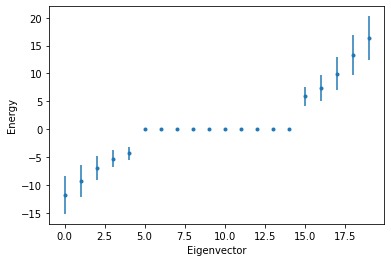

In [12]:
#plot examples
#eigenvalues, lowest to highest
#errorbar is imaginary part of eigenvalue, corresponds to the linewidth (guided by kappa)
plot.eigenvalues(cavity_array)

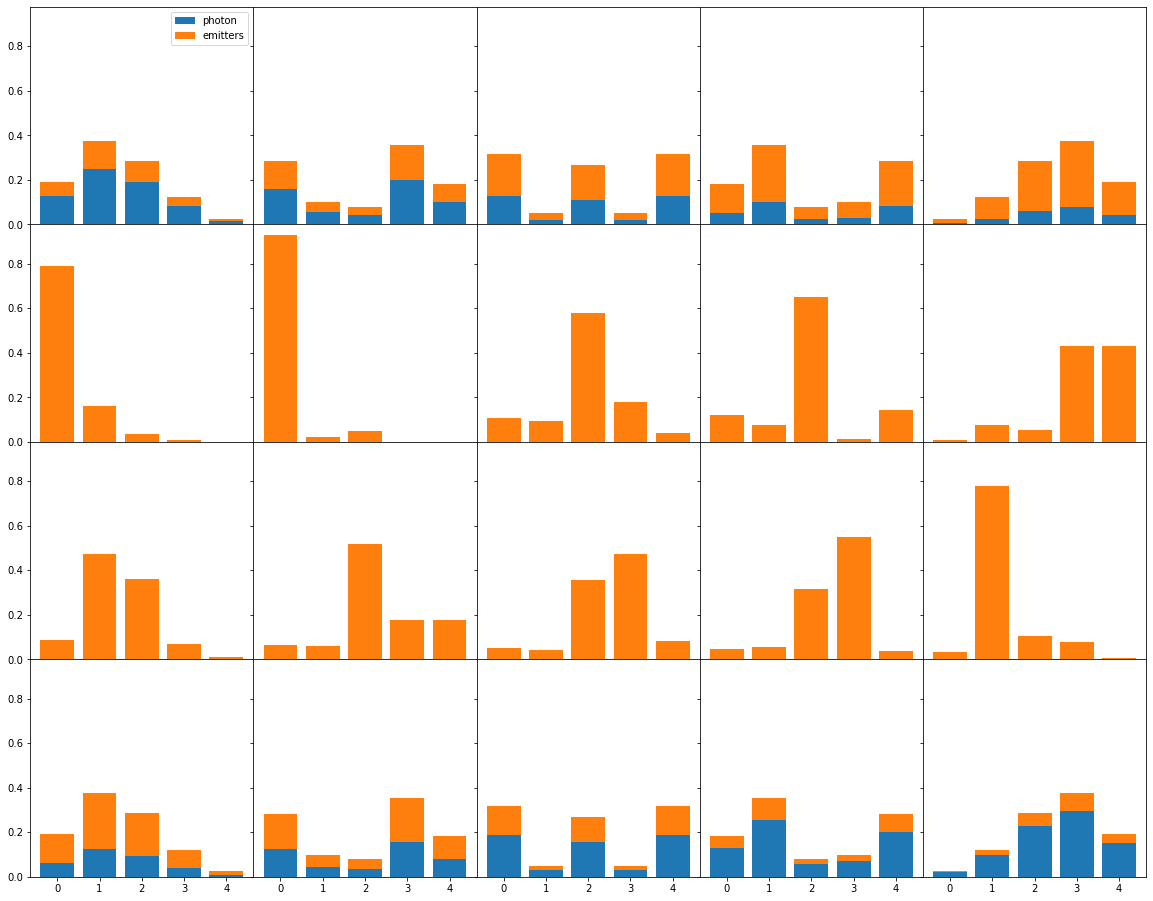

In [7]:
#plot cavity occupancy: probability of photon or excited emitter in each node (cavity)
#for each eigenstate (lowest to highest energy)
plot.cavity_occupancy(cavity_array)

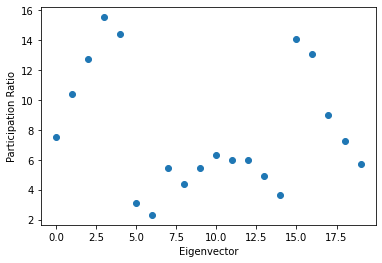

In [13]:
#participation ratio for each eigenstate
plot.participation(cavity_array)

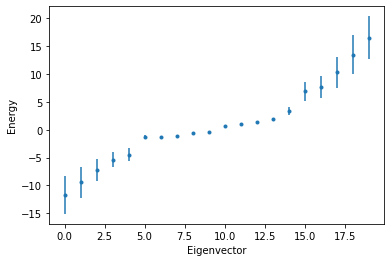

In [15]:
#randomize parameters
#eg. random emitter freqs
spread = g
center_freq = 0
ef = rand.emitter_freqs(num_cavities, num_emitters, center_freq, spread)

#update model params
model_params['emitter_freqs'] = ef 

#new cavity array
cavity_array = multi_cavity.CavityArray(num_cavities, num_photons, model_params, periodic)

plot.eigenvalues(cavity_array)

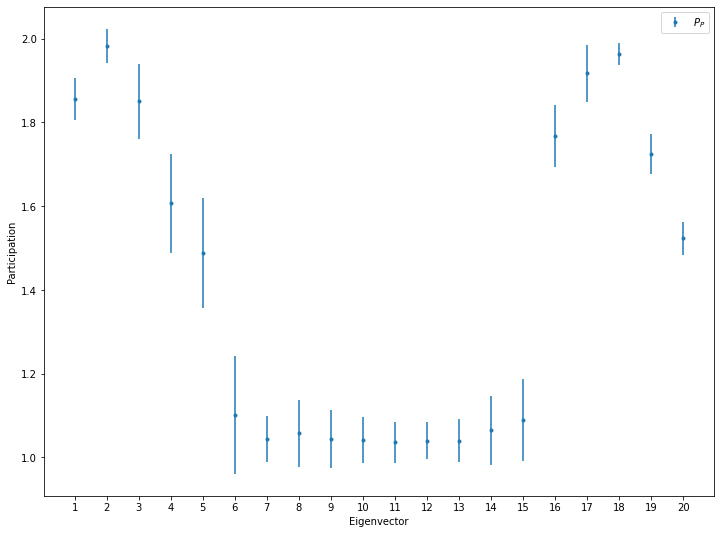

In [27]:
#use metrics to make figure of avg polariton participation for 100 diff random realizations of emitter freqs
nruns = 100


tempresults = []
efs = [rand.emitter_freqs(num_cavities, num_emitters, center_freq, spread) for i in range(nruns)]
for ef in efs:
    model_params['emitter_freqs'] = ef 
    cavity_array = multi_cavity.CavityArray(num_cavities, num_photons, model_params, periodic)
    
    #polariton participation ratio for each eigenstate
    pp = metrics.polariton_participation(cavity_array)
    tempresults.append(pp)
    
mean = np.mean(tempresults, axis=0)
std = np.std(tempresults, axis=0)

#create fig
nrows, ncols = 1, 1
fig, axes = plt.subplots(nrows, ncols, sharex='all', sharey='all', gridspec_kw={'wspace':0.5, 'hspace':0.05}, figsize=((12)*ncols,(9)*nrows), squeeze=False)

#plot
x = range(1, 1+len(mean))
axes[0,0].errorbar(x, mean, std, fmt='.', label='$P_P$')

#formate plot
axes[0,0].set_xlabel('Eigenvector')
axes[0,0].set_xticks(x)
axes[0,0].set_ylabel('Participation')
axes[0,0].legend()

plt.show()